In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import pandas as pd

In [7]:
# Import the stellar parameters with calibration and line cut variation
file_name = "../data/stellar_param_cal_cut.csv"
s_param_all = pd.read_csv(file_name,skiprows=1)
s_param_all.head()

,Name,teff,logg,fe_h,fe_h_err,vt,N_fei,N_feii,teff_cal,logg_cal,...,vt_cutcal,N_fei_cutcal,N_feii_cutcal,teff_photo,logg_photo,fei_h_photo,fei_h_err_photo,feii_h_photo,feii_h_err_photo,vt_photo
0,SMSS5,4420,0.30,-2.56,0.12,1.75,149,5,4648,1.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SMSS6,4990,1.55,-1.49,0.15,1.67,165,9,5161,1.95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SMSS9,4730,1.50,-2.23,0.16,1.60,163,11,4927,2.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SMSS11,4730,0.95,-1.95,0.11,1.87,167,10,4927,1.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SMSS14,5100,2.65,-1.64,0.17,1.25,195,15,5260,2.95,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Import the isochrones from Alex's mods
iso_file_path = "/Users/xwou/Documents/Research/utilities/alexmods/alexmods/alexmods/data/isochrones/"
isochrone_logteff_logg_25 = np.genfromtxt(iso_file_path+"dartmouth_DECAM_MH-25ap4.iso",usecols=(2,3))
isochrone_logteff_logg_20 = np.genfromtxt(iso_file_path+"dartmouth_DECAM_MH-20ap4.iso",usecols=(2,3))
isochrone_logteff_logg_15 = np.genfromtxt(iso_file_path+"dartmouth_DECAM_MH-15ap4.iso",usecols=(2,3))

In [4]:
# Define functions for logg v_t relation
def B05(logg):
    vt=0.0865*(logg)**2 - 0.6897*(logg) + 2.808
    return vt

def M08(logg):
    vt=2.22 - 0.322 * logg
    return vt

def K09(logg):
    vt=2.13 - 0.23 * logg
    return vt

Plotting stars: ['SMSS15' 'SMSS1_15' 'SMSS1_29' 'SMSS334' 'SMSS653' 'SMSS728']


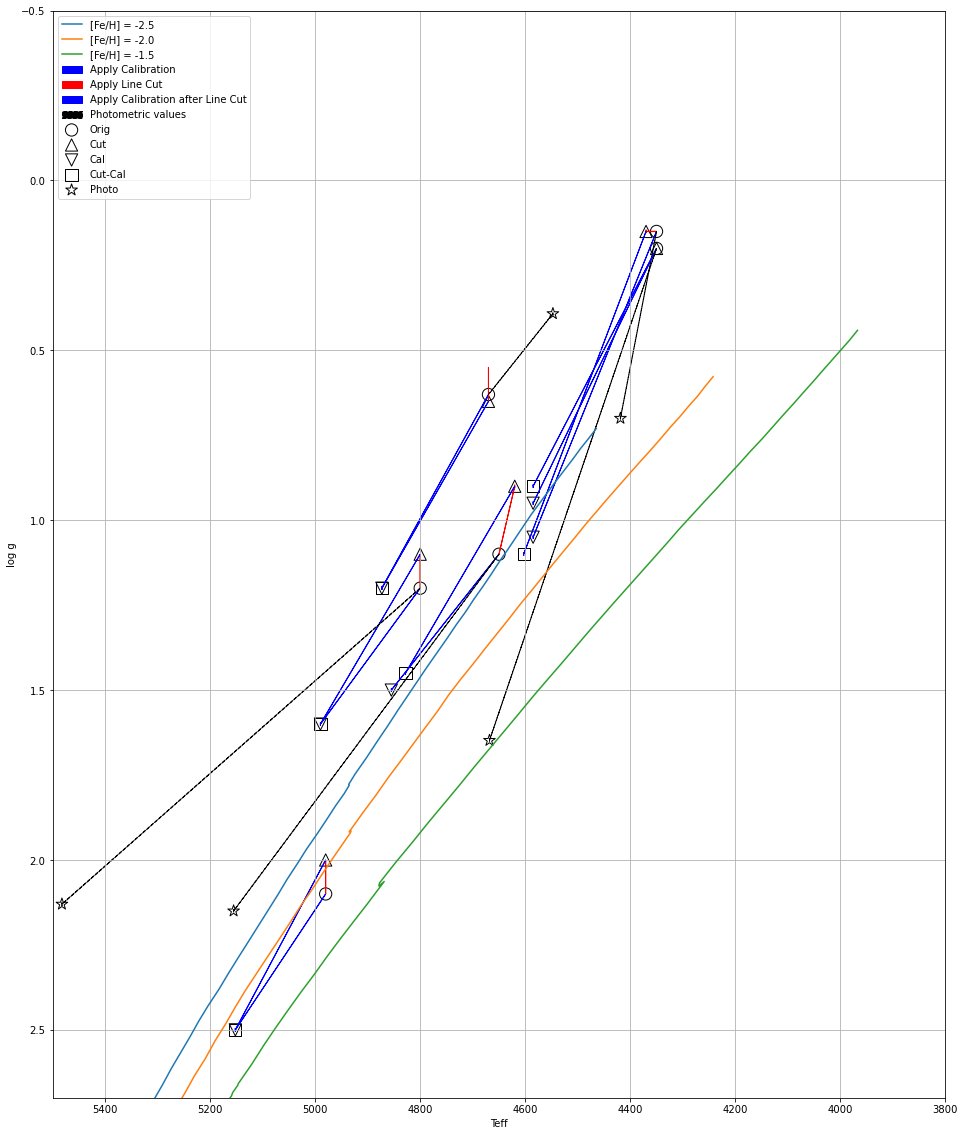

In [11]:
# Select the stars of interest
ind_interest = np.where(s_param_all['teff_cutcal'].values >0)[0]
print('Plotting stars:',s_param_all['Name'][ind_interest].values)

ms = 150
hw = 0.01
hl = 0.1

# Plot the isochrone for five ages
f = plt.figure(figsize=[16,20])
plt.plot(10**isochrone_logteff_logg_25[:267,0],isochrone_logteff_logg_25[:267,1],label="[Fe/H] = -2.5")
plt.plot(10**isochrone_logteff_logg_20[:267,0],isochrone_logteff_logg_20[:267,1],label="[Fe/H] = -2.0")
plt.plot(10**isochrone_logteff_logg_15[:267,0],isochrone_logteff_logg_15[:267,1],label="[Fe/H] = -1.5")
# plt.plot(10**isochrone_logteff_logg[267:534,0],isochrone_logteff_logg[267:534,1])
# plt.plot(10**isochrone_logteff_logg[534:800,0],isochrone_logteff_logg[534:800,1])
# plt.plot(10**isochrone_logteff_logg[800:1066,0],isochrone_logteff_logg[800:1066,1])
# plt.plot(10**isochrone_logteff_logg[1066:,0],isochrone_logteff_logg[1066:,1])
plt.scatter(s_param_all['teff'][ind_interest],s_param_all['logg'][ind_interest],s=ms,edgecolor='k',facecolors='none',marker='o',label='Orig')
plt.scatter(s_param_all['teff_cut'][ind_interest],s_param_all['logg_cut'][ind_interest],s=ms,edgecolor='k',facecolors='none',marker='^',label='Cut')
plt.scatter(s_param_all['teff_cal'][ind_interest],s_param_all['logg_cal'][ind_interest],s=ms,edgecolor='k',facecolors='none',marker='v',label='Cal')
plt.scatter(s_param_all['teff_cutcal'][ind_interest],s_param_all['logg_cutcal'][ind_interest],s=ms,edgecolor='k',facecolors='none',marker='s',label='Cut-Cal')
# plt.scatter(s_param_all['teff_calcut'][ind_interest],s_param_all['logg_calcut'][ind_interest],s=ms,edgecolor='k',facecolors='none',marker='*',label='Cal-Cut')
plt.scatter(s_param_all['teff_photo'][ind_interest],s_param_all['logg_photo'][ind_interest],s=ms,edgecolor='k',facecolors='none',marker='*',label='Photo')


for i in range(len(ind_interest)):
    ind = ind_interest[i]
    if i == 0:
        plt.arrow(s_param_all['teff'][ind],s_param_all['logg'][ind],
                  s_param_all['teff_cal'][ind]-s_param_all['teff'][ind],
                  s_param_all['logg_cal'][ind]-s_param_all['logg'][ind],color='b',
                  length_includes_head=True,head_width=hw,head_length=hl,label="Apply Calibration")

        plt.arrow(s_param_all['teff'][ind],s_param_all['logg'][ind],
                  s_param_all['teff_cut'][ind]-s_param_all['teff'][ind],
                  s_param_all['logg_cut'][ind]-s_param_all['logg'][ind],color='r',
                  length_includes_head=True,head_width=hw,head_length=hl,label="Apply Line Cut")
        
#         plt.arrow(s_param_all['teff_cal'][ind],s_param_all['logg_cal'][ind],
#                   s_param_all['teff_calcut'][ind]-s_param_all['teff_cal'][ind],
#                   s_param_all['logg_calcut'][ind]-s_param_all['logg_cal'][ind],color='r',
#                   length_includes_head=True,head_width=hw,head_length=hl,label="Apply Line Cut after Calibration")
        
        plt.arrow(s_param_all['teff_cut'][ind],s_param_all['logg_cut'][ind],
                  s_param_all['teff_cutcal'][ind]-s_param_all['teff_cut'][ind],
                  s_param_all['logg_cutcal'][ind]-s_param_all['logg_cut'][ind],color='b',
                  length_includes_head=True,head_width=hw,head_length=hl,label="Apply Calibration after Line Cut")
        
        plt.arrow(s_param_all['teff'][ind],s_param_all['logg'][ind],
                  s_param_all['teff_photo'][ind]-s_param_all['teff'][ind],
                  s_param_all['logg_photo'][ind]-s_param_all['logg'][ind],color='k',linestyle='--',
                  length_includes_head=True,head_width=hw,head_length=hl,label="Photometric values")
        
    else:
        plt.arrow(s_param_all['teff'][ind],s_param_all['logg'][ind],
                  s_param_all['teff_cal'][ind]-s_param_all['teff'][ind],
                  s_param_all['logg_cal'][ind]-s_param_all['logg'][ind],color='b',
                  length_includes_head=True,head_width=hw,head_length=hl)

        plt.arrow(s_param_all['teff'][ind],s_param_all['logg'][ind],
                  s_param_all['teff_cut'][ind]-s_param_all['teff'][ind],
                  s_param_all['logg_cut'][ind]-s_param_all['logg'][ind],color='r',
                  length_includes_head=True,head_width=hw,head_length=hl)
        
#         plt.arrow(s_param_all['teff_cal'][ind],s_param_all['logg_cal'][ind],
#                   s_param_all['teff_calcut'][ind]-s_param_all['teff_cal'][ind],
#                   s_param_all['logg_calcut'][ind]-s_param_all['logg_cal'][ind],color='r',
#                   length_includes_head=True,head_width=hw,head_length=hl)
        
        plt.arrow(s_param_all['teff_cut'][ind],s_param_all['logg_cut'][ind],
                  s_param_all['teff_cutcal'][ind]-s_param_all['teff_cut'][ind],
                  s_param_all['logg_cutcal'][ind]-s_param_all['logg_cut'][ind],color='b',
                  length_includes_head=True,head_width=hw,head_length=hl)
        
        plt.arrow(s_param_all['teff'][ind],s_param_all['logg'][ind],
                  s_param_all['teff_photo'][ind]-s_param_all['teff'][ind],
                  s_param_all['logg_photo'][ind]-s_param_all['logg'][ind],color='k',linestyle='--',
                  length_includes_head=True,head_width=hw,head_length=hl)
    

plt.xlabel('Teff')
plt.ylabel('log g')
plt.xlim([5500,3800])
plt.ylim([2.7,-0.5])
plt.grid()
plt.legend(loc=2)
plt.show()
f.savefig("logg_teff_cal_exp.pdf",bbox_inches='tight')

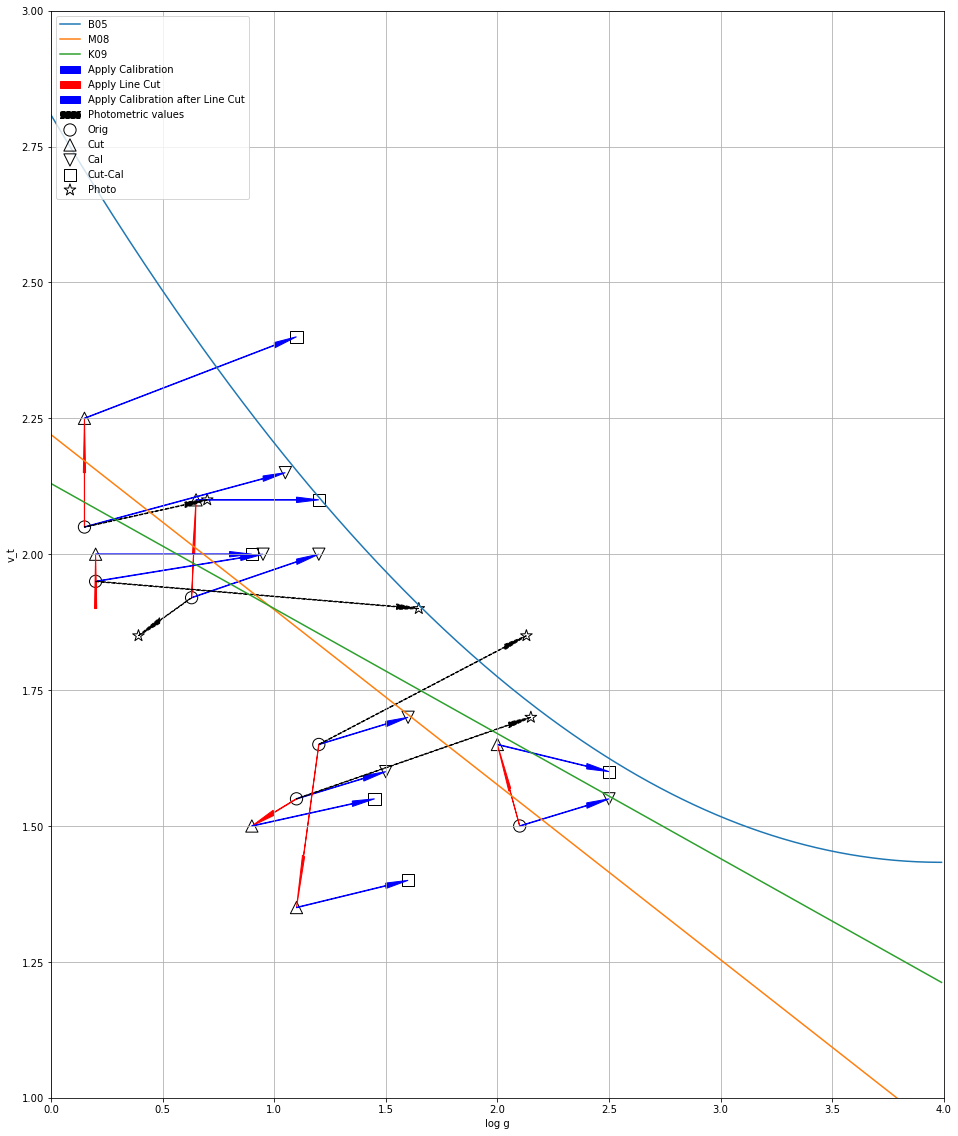

In [12]:
# Plot the logg vt relation
logg_arr = np.arange(0,4,0.01)
vt_arr_B05 = B05(logg_arr)
vt_arr_M08 = M08(logg_arr)
vt_arr_K09 = K09(logg_arr)

f = plt.figure(figsize=[16,20])
plt.plot(logg_arr,vt_arr_B05,label="B05")
plt.plot(logg_arr,vt_arr_M08,label="M08")
plt.plot(logg_arr,vt_arr_K09,label="K09")
# plt.plot(10**isochrone_logteff_logg[267:534,0],isochrone_logteff_logg[267:534,1])
# plt.plot(10**isochrone_logteff_logg[534:800,0],isochrone_logteff_logg[534:800,1])
# plt.plot(10**isochrone_logteff_logg[800:1066,0],isochrone_logteff_logg[800:1066,1])
# plt.plot(10**isochrone_logteff_logg[1066:,0],isochrone_logteff_logg[1066:,1])
plt.scatter(s_param_all['logg'][ind_interest],s_param_all['vt'][ind_interest],s=ms,edgecolor='k',facecolors='none',marker='o',label='Orig')
plt.scatter(s_param_all['logg_cut'][ind_interest],s_param_all['vt_cut'][ind_interest],s=ms,edgecolor='k',facecolors='none',marker='^',label='Cut')
plt.scatter(s_param_all['logg_cal'][ind_interest],s_param_all['vt_cal'][ind_interest],s=ms,edgecolor='k',facecolors='none',marker='v',label='Cal')
plt.scatter(s_param_all['logg_cutcal'][ind_interest],s_param_all['vt_cutcal'][ind_interest],s=ms,edgecolor='k',facecolors='none',marker='s',label='Cut-Cal')
# plt.scatter(s_param_all['logg_calcut'][ind_interest],s_param_all['vt_calcut'][ind_interest],s=ms,edgecolor='k',facecolors='none',marker='*',label='Cal-Cut')
plt.scatter(s_param_all['logg_photo'][ind_interest],s_param_all['vt_photo'][ind_interest],s=ms,edgecolor='k',facecolors='none',marker='*',label='Photo')


for i in range(len(ind_interest)):
    ind = ind_interest[i]
    if i == 0:
        plt.arrow(s_param_all['logg'][ind],s_param_all['vt'][ind],
                  s_param_all['logg_cal'][ind]-s_param_all['logg'][ind],
                  s_param_all['vt_cal'][ind]-s_param_all['vt'][ind],color='b',
                  length_includes_head=True,head_width=hw,head_length=hl,label="Apply Calibration")

        plt.arrow(s_param_all['logg'][ind],s_param_all['vt'][ind],
                  s_param_all['logg_cut'][ind]-s_param_all['logg'][ind],
                  s_param_all['vt_cut'][ind]-s_param_all['vt'][ind],color='r',
                  length_includes_head=True,head_width=hw,head_length=hl,label="Apply Line Cut")
        
#         plt.arrow(s_param_all['logg_cal'][ind],s_param_all['vt_cal'][ind],
#                   s_param_all['logg_calcut'][ind]-s_param_all['logg_cal'][ind],
#                   s_param_all['vt_calcut'][ind]-s_param_all['vt_cal'][ind],color='r',
#                   length_includes_head=True,head_width=hw,head_length=hl,label="Apply Line Cut after Calibration")
        
        plt.arrow(s_param_all['logg_cut'][ind],s_param_all['vt_cut'][ind],
                  s_param_all['logg_cutcal'][ind]-s_param_all['logg_cut'][ind],
                  s_param_all['vt_cutcal'][ind]-s_param_all['vt_cut'][ind],color='b',
                  length_includes_head=True,head_width=hw,head_length=hl,label="Apply Calibration after Line Cut")
        
        plt.arrow(s_param_all['logg'][ind],s_param_all['vt'][ind],
                  s_param_all['logg_photo'][ind]-s_param_all['logg'][ind],
                  s_param_all['vt_photo'][ind]-s_param_all['vt'][ind],color='k',linestyle='--',
                  length_includes_head=True,head_width=hw,head_length=hl,label="Photometric values")
        
    else:
        plt.arrow(s_param_all['logg'][ind],s_param_all['vt'][ind],
                  s_param_all['logg_cal'][ind]-s_param_all['logg'][ind],
                  s_param_all['vt_cal'][ind]-s_param_all['vt'][ind],color='b',
                  length_includes_head=True,head_width=hw,head_length=hl)

        plt.arrow(s_param_all['logg'][ind],s_param_all['vt'][ind],
                  s_param_all['logg_cut'][ind]-s_param_all['logg'][ind],
                  s_param_all['vt_cut'][ind]-s_param_all['vt'][ind],color='r',
                  length_includes_head=True,head_width=hw,head_length=hl)
        
#         plt.arrow(s_param_all['logg_cal'][ind],s_param_all['vt_cal'][ind],
#                   s_param_all['logg_calcut'][ind]-s_param_all['logg_cal'][ind],
#                   s_param_all['vt_calcut'][ind]-s_param_all['vt_cal'][ind],color='r',
#                   length_includes_head=True,head_width=hw,head_length=hl)
        
        plt.arrow(s_param_all['logg_cut'][ind],s_param_all['vt_cut'][ind],
                  s_param_all['logg_cutcal'][ind]-s_param_all['logg_cut'][ind],
                  s_param_all['vt_cutcal'][ind]-s_param_all['vt_cut'][ind],color='b',
                  length_includes_head=True,head_width=hw,head_length=hl)
        
        plt.arrow(s_param_all['logg'][ind],s_param_all['vt'][ind],
                  s_param_all['logg_photo'][ind]-s_param_all['logg'][ind],
                  s_param_all['vt_photo'][ind]-s_param_all['vt'][ind],color='k',linestyle='--',
                  length_includes_head=True,head_width=hw,head_length=hl)
    

plt.xlabel('log g')
plt.ylabel('v_t')
plt.xlim([0,4])
plt.ylim([1,3])
plt.grid()
plt.legend(loc=2)
plt.show()
f.savefig("vt_logg_cal_exp.pdf",bbox_inches='tight')

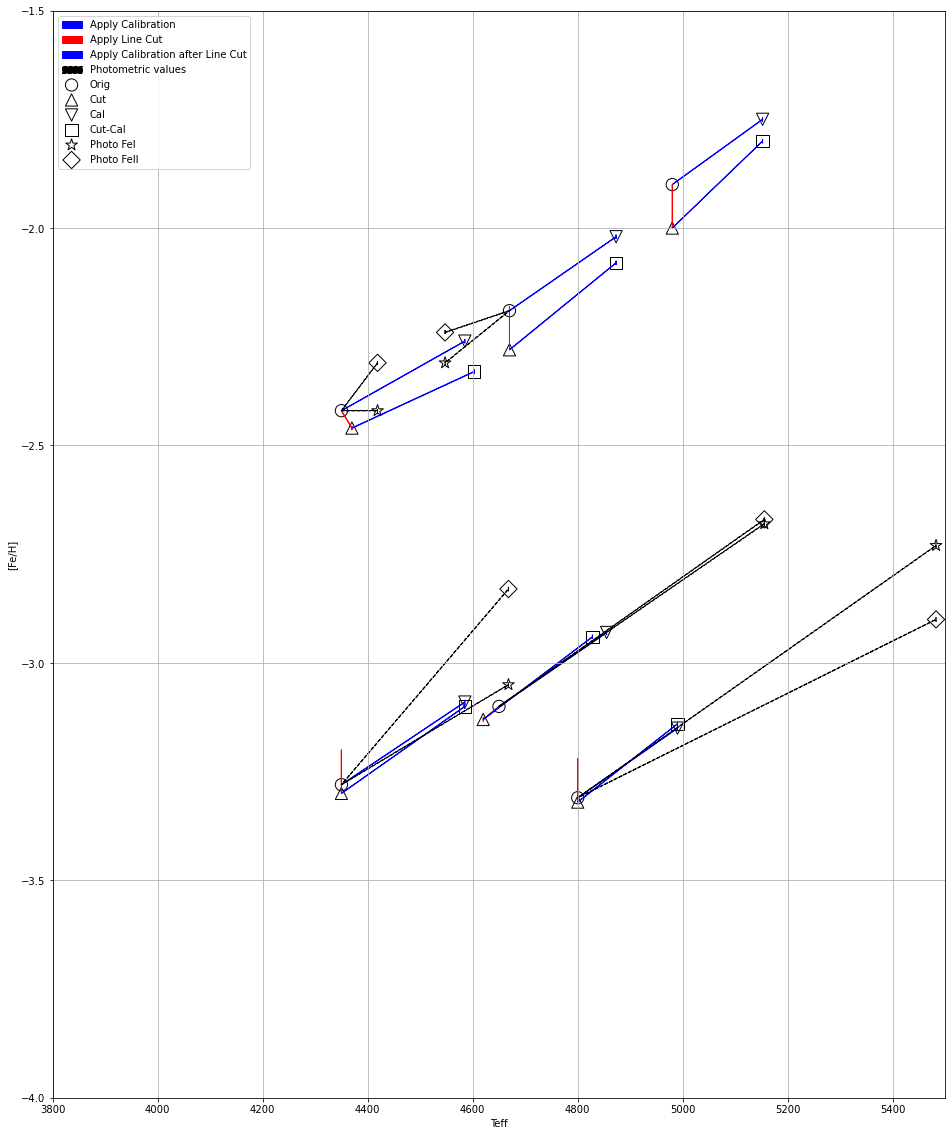

In [13]:
# Plot the isochrone for five ages
f = plt.figure(figsize=[16,20])
# plt.plot(10**isochrone_logteff_logg_25[:267,0],isochrone_logteff_logg_25[:267,1],label="[Fe/H] = -2.5")
# plt.plot(10**isochrone_logteff_logg_20[:267,0],isochrone_logteff_logg_20[:267,1],label="[Fe/H] = -2.0")
# plt.plot(10**isochrone_logteff_logg_15[:267,0],isochrone_logteff_logg_15[:267,1],label="[Fe/H] = -1.5")
# plt.plot(10**isochrone_logteff_logg[267:534,0],isochrone_logteff_logg[267:534,1])
# plt.plot(10**isochrone_logteff_logg[534:800,0],isochrone_logteff_logg[534:800,1])
# plt.plot(10**isochrone_logteff_logg[800:1066,0],isochrone_logteff_logg[800:1066,1])
# plt.plot(10**isochrone_logteff_logg[1066:,0],isochrone_logteff_logg[1066:,1])
plt.scatter(s_param_all['teff'][ind_interest],s_param_all['fe_h'][ind_interest],s=ms,edgecolor='k',facecolors='none',marker='o',label='Orig')
plt.scatter(s_param_all['teff_cut'][ind_interest],s_param_all['fe_h_cut'][ind_interest],s=ms,edgecolor='k',facecolors='none',marker='^',label='Cut')
plt.scatter(s_param_all['teff_cal'][ind_interest],s_param_all['fe_h_cal'][ind_interest],s=ms,edgecolor='k',facecolors='none',marker='v',label='Cal')
plt.scatter(s_param_all['teff_cutcal'][ind_interest],s_param_all['fe_h_cutcal'][ind_interest],s=ms,edgecolor='k',facecolors='none',marker='s',label='Cut-Cal')
# plt.scatter(s_param_all['teff_calcut'][ind_interest],s_param_all['logg_calcut'][ind_interest],s=ms,edgecolor='k',facecolors='none',marker='*',label='Cal-Cut')
plt.scatter(s_param_all['teff_photo'][ind_interest],s_param_all['fei_h_photo'][ind_interest],s=ms,edgecolor='k',facecolors='none',marker='*',label='Photo FeI')
plt.scatter(s_param_all['teff_photo'][ind_interest],s_param_all['feii_h_photo'][ind_interest],s=ms,edgecolor='k',facecolors='none',marker='D',label='Photo FeII')


for i in range(len(ind_interest)):
    ind = ind_interest[i]
    if i == 0:
        plt.arrow(s_param_all['teff'][ind],s_param_all['fe_h'][ind],
                  s_param_all['teff_cal'][ind]-s_param_all['teff'][ind],
                  s_param_all['fe_h_cal'][ind]-s_param_all['fe_h'][ind],color='b',
                  length_includes_head=True,head_width=hw,head_length=hl,label="Apply Calibration")

        plt.arrow(s_param_all['teff'][ind],s_param_all['fe_h'][ind],
                  s_param_all['teff_cut'][ind]-s_param_all['teff'][ind],
                  s_param_all['fe_h_cut'][ind]-s_param_all['fe_h'][ind],color='r',
                  length_includes_head=True,head_width=hw,head_length=hl,label="Apply Line Cut")
        
#         plt.arrow(s_param_all['teff_cal'][ind],s_param_all['fe_h_cal'][ind],
#                   s_param_all['teff_calcut'][ind]-s_param_all['teff_cal'][ind],
#                   s_param_all['fe_h_calcut'][ind]-s_param_all['fe_h_cal'][ind],color='r',
#                   length_includes_head=True,head_width=hw,head_length=hl,label="Apply Line Cut after Calibration")
        
        plt.arrow(s_param_all['teff_cut'][ind],s_param_all['fe_h_cut'][ind],
                  s_param_all['teff_cutcal'][ind]-s_param_all['teff_cut'][ind],
                  s_param_all['fe_h_cutcal'][ind]-s_param_all['fe_h_cut'][ind],color='b',
                  length_includes_head=True,head_width=hw,head_length=hl,label="Apply Calibration after Line Cut")
        
        plt.arrow(s_param_all['teff'][ind],s_param_all['fe_h'][ind],
                  s_param_all['teff_photo'][ind]-s_param_all['teff'][ind],
                  s_param_all['fei_h_photo'][ind]-s_param_all['fe_h'][ind],color='k',linestyle='--',
                  length_includes_head=True,head_width=hw,head_length=hl,label="Photometric values")
        
        plt.arrow(s_param_all['teff'][ind],s_param_all['fe_h'][ind],
                  s_param_all['teff_photo'][ind]-s_param_all['teff'][ind],
                  s_param_all['feii_h_photo'][ind]-s_param_all['fe_h'][ind],color='k',linestyle='--',
                  length_includes_head=True,head_width=hw,head_length=hl)
        
    else:
        plt.arrow(s_param_all['teff'][ind],s_param_all['fe_h'][ind],
                  s_param_all['teff_cal'][ind]-s_param_all['teff'][ind],
                  s_param_all['fe_h_cal'][ind]-s_param_all['fe_h'][ind],color='b',
                  length_includes_head=True,head_width=hw,head_length=hl)

        plt.arrow(s_param_all['teff'][ind],s_param_all['fe_h'][ind],
                  s_param_all['teff_cut'][ind]-s_param_all['teff'][ind],
                  s_param_all['fe_h_cut'][ind]-s_param_all['fe_h'][ind],color='r',
                  length_includes_head=True,head_width=hw,head_length=hl)
        
#         plt.arrow(s_param_all['teff_cal'][ind],s_param_all['fe_h_cal'][ind],
#                   s_param_all['teff_calcut'][ind]-s_param_all['teff_cal'][ind],
#                   s_param_all['fe_h_calcut'][ind]-s_param_all['fe_h_cal'][ind],color='r',
#                   length_includes_head=True,head_width=hw,head_length=hl)
        
        plt.arrow(s_param_all['teff_cut'][ind],s_param_all['fe_h_cut'][ind],
                  s_param_all['teff_cutcal'][ind]-s_param_all['teff_cut'][ind],
                  s_param_all['fe_h_cutcal'][ind]-s_param_all['fe_h_cut'][ind],color='b',
                  length_includes_head=True,head_width=hw,head_length=hl)
        
        plt.arrow(s_param_all['teff'][ind],s_param_all['fe_h'][ind],
                  s_param_all['teff_photo'][ind]-s_param_all['teff'][ind],
                  s_param_all['fei_h_photo'][ind]-s_param_all['fe_h'][ind],color='k',linestyle='--',
                  length_includes_head=True,head_width=hw,head_length=hl)
        
        plt.arrow(s_param_all['teff'][ind],s_param_all['fe_h'][ind],
                  s_param_all['teff_photo'][ind]-s_param_all['teff'][ind],
                  s_param_all['feii_h_photo'][ind]-s_param_all['fe_h'][ind],color='k',linestyle='--',
                  length_includes_head=True,head_width=hw,head_length=hl)
    

plt.xlabel('Teff')
plt.ylabel('[Fe/H]')
plt.xlim([3800,5500])
plt.ylim([-4,-1.5])
plt.grid()
plt.legend(loc=2)
plt.show()
f.savefig("fe_h_teff_cal_exp.pdf",bbox_inches='tight')